# Essential basics
This jupyter notebook accurately follows up instructions described in 'exercise_1.pdf'. 
For convinience they were also dublicated here.

In [232]:
import pylab as pl
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

## Part 1

Generate N = 100 data points from a 2-d gaussian Distribution with mean [1, 2].T

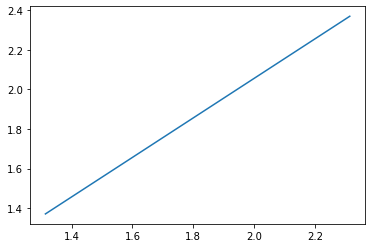

In [233]:
N = 100
mean = np.array([1,2]).T
cov = np.array([[1,1],[1,1]])

X = np.random.multivariate_normal(mean, cov, N)
plt.plot(X[0,:],X[1,:])

1. Create a linear mapping A such that AX scales the first row of X by 1/2



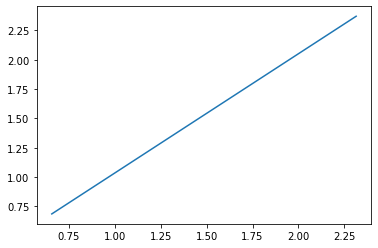

In [234]:
A = np.array([[1/2, 0],[0, 1]])
X_1 = np.dot(X, A)
plt.plot(X_1[0,:],X_1[1,:])

2. Create a linear mapping B such that BAX mirrors the data at the y-axis

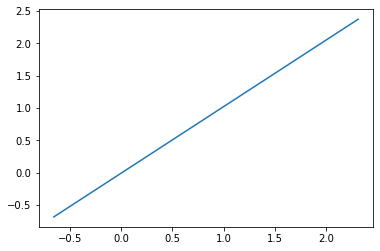

In [235]:
B = np.array([[-1, 0],[0, 1]])
X_2 = np.dot(X_1, B)
plt.plot(X_2[0,:],X_2[1,:])


Create a linear mapping C such that CBAX permutes the y-axis and x-axis

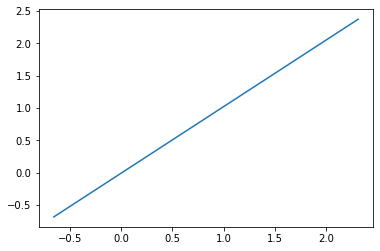

In [236]:
C = np.array([[0,1],[1,0]])
X_3 = np.dot(X_2, C)
plt.plot(X_3[0,:],X_3[1,:])

Create a linear mapping D such that DCBAX rotates the data by 45◦

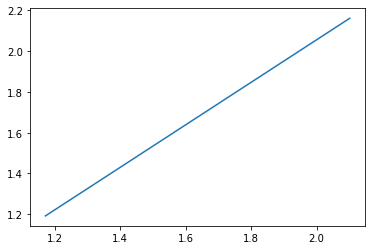

In [237]:
D = np.array([[np.cos(np.pi/4), np.sin(np.pi/4)],[-np.sin(np.pi/4), np.cos(np.pi/4)]])
X_4 = np.dot(X_3, D)
plt.plot(X_4[0,:],X_4[1,:])

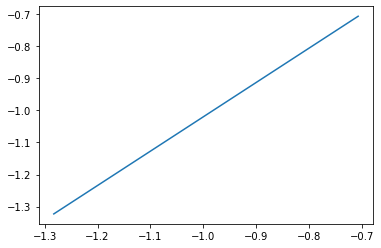

In [238]:
E = D@C@B@A
result_1 = np.dot(X, E)
plt.plot(result_1[0,:],result_1[1,:])

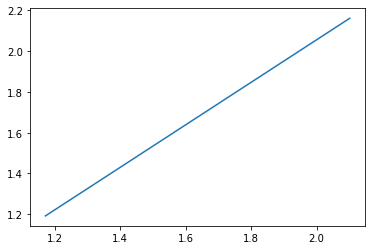

In [239]:
F = A@B@C@D
result_2 = np.dot(X, F)
plt.plot(result_2[0,:],result_2[1,:])

## Part 2

Loading numeric data in ASCII format
Download an example text file from the moodle. 
The file is called: handpositions.txt Each row of this file contains tab-separated 2d-coordinates.
Write a function that

a) loads the data into a d-by-N array (N is the number of data points/rows of the file) 

b) plots the 2d-coordinates as in Part 1.

In [277]:
result = []
with open('handpositions.txt') as f:
    
    for line in f:
       result.append(list(map(float,line.replace(" ", "").split('\t')[:-1])))
result = np.array(result)

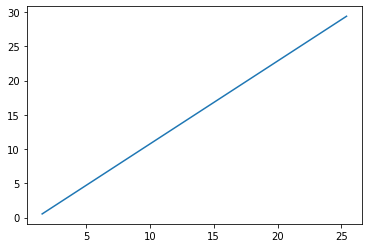

In [278]:
plt.plot(result[0,:],result[1,:])

## Part 3 

Some basic operations on time series (Z-Scoring)

a) Take the same data matrix as in assignment 4.

b) Transform each row A[i, :] of that matrix such that its mean

In [294]:
data = result.copy()
avg = np.mean(data, axis=0)
std = np.std(data, axis=0)
avg, std

(array([5.13450365, 1.9907669 ]), array([24.47828063, 16.25577309]))

In [295]:
z_scored = (data - avg)/std
np.mean(z_scored, axis=0), np.std(z_scored, axis=0)

(array([ 1.73961002e-16, -9.18670461e-17]), array([1., 1.]))

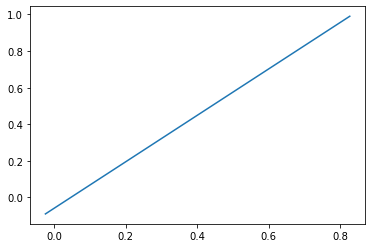

In [296]:
plt.plot(z_scored[0,:], z_scored[1,:])